In [92]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.24.1 pandas==1.5.3 -q --user --no-warn-script-location

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.1 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [43]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [8]:
# uncomment and run the following lines in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# loading the dataset
data = pd.read_csv("new_preprocessed_data.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [11]:
data.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


In [17]:
data['loan_status'].unique()

array([0, 2, 1])

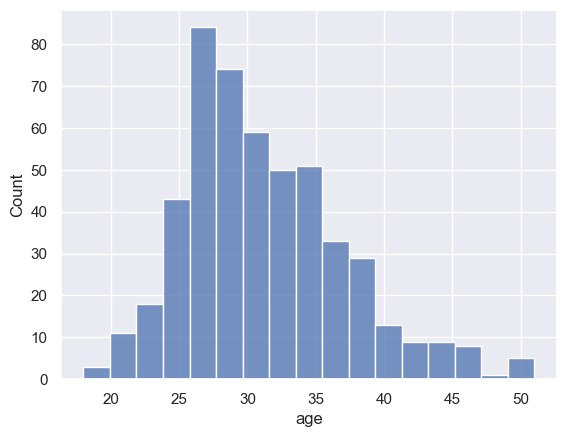

In [13]:
sns.histplot(data=data, x='age');

In [14]:
X = data.drop(["loan_status"], axis=1)
y = data["loan_status"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [16]:
y_train.shape

(400,)

In [18]:
y_train = keras.utils.to_categorical(y_train, 3)

In [19]:
y_train.shape

(400, 3)

In [20]:
y_train[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [22]:
x_train.shape

(320, 11)

In [23]:
tf.keras.backend.clear_session()

In [26]:
# initializing the neural network
model = Sequential()
dropout_rate=0.2
model.add(Dense(64,activation='relu',input_dim = x_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(32,activation="relu"))
model.add(Dense(3, activation = 'softmax'))

In [27]:
batch_size = x_train.shape[0]
epochs = 20
adam_optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [28]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/20
1/1 [==============================] - 0s 283ms/step - loss: 39.5034 - accuracy: 0.4625 - val_loss: 26.6332 - val_accuracy: 0.6375
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 37.3323 - accuracy: 0.4437 - val_loss: 25.0140 - val_accuracy: 0.6375
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 35.5375 - accuracy: 0.4750 - val_loss: 22.8931 - val_accuracy: 0.6375
Epoch 4/20
1/1 [==============================] - 0s 12ms/step - loss: 32.6844 - accuracy: 0.4375 - val_loss: 21.2509 - val_accuracy: 0.6375
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 27.8801 - accuracy: 0.5031 - val_loss: 19.0234 - val_accuracy: 0.6375
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 31.2963 - accuracy: 0.4031 - val_loss: 16.3907 - val_accuracy: 0.6375
Epoch 7/20
1/1 [==============================] - 0s 12ms/step - loss: 31.2130 - accuracy: 0.4219 - val_loss: 14.2001 - val_accuracy: 0.6375
Epoch 8/20
1

In [29]:
# predict probabilities for test set
y_test_cat = keras.utils.to_categorical(y_test, 3)
y_pred = model.predict(x_test)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(x_test)
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

f1_scores = f1_score(y_test, y_pred, average=None)  # Get F1 for ALL classes
f1_scores[0] 






4/4 [==============================] - 0s 637us/step


0.6754966887417219

In [36]:
tf.keras.backend.clear_session()

In [37]:
# initializing the neural network
model = Sequential()

model.add(Dense(128,activation='relu',input_dim = x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3, activation = 'softmax'))

In [38]:
batch_size = 128
epochs = 100
adam_optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [39]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
3/3 [==============================] - 0s 35ms/step - loss: 1.7290 - accuracy: 0.1750 - val_loss: 1.2477 - val_accuracy: 0.1875
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4640 - accuracy: 0.2156 - val_loss: 1.0360 - val_accuracy: 0.6500
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 1.3214 - accuracy: 0.2219 - val_loss: 0.9851 - val_accuracy: 0.6375
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 1.2014 - accuracy: 0.2875 - val_loss: 0.9657 - val_accuracy: 0.6375
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 1.1237 - accuracy: 0.3656 - val_loss: 0.9690 - val_accuracy: 0.6375
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 1.1011 - accuracy: 0.4313 - val_loss: 0.9820 - val_accuracy: 0.6375
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1.0203 - accuracy: 0.5437 - val_loss: 0.9899 - val_accuracy: 0.6375
Epoch 8/100
3/3 [=========

In [40]:
train_accuracy = history.history['accuracy']  # Training accuracy per epoch
val_accuracy = history.history['val_accuracy']  # Validation accuracy per epoch

print(f"Training Accuracy (last epoch): {train_accuracy[-1]:.4f}")
print(f"Validation Accuracy (last epoch): {val_accuracy[-1]:.4f}")

Training Accuracy (last epoch): 0.6187
Validation Accuracy (last epoch): 0.6375


In [44]:
# predict probabilities for test set
y_test_cat = keras.utils.to_categorical(y_test, 3)
y_pred = model.predict(x_test)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(x_test)
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

precision_scores = precision_score(y_test, y_pred, average=None)  # Get F1 for ALL classes
precision_scores[0] 


4/4 [==============================] - 0s 641us/step


0.51

In [82]:
tf.keras.backend.clear_session()

In [83]:
# initializing the neural network
model = Sequential()

model.add(Dense(64,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(32,activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [84]:
batch_size = 128
epochs = 100
sdg_optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=sdg_optimizer, metrics=["accuracy"])

In [85]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
3/3 [==============================] - 0s 32ms/step - loss: 332.0447 - accuracy: 0.3531 - val_loss: 30.6843 - val_accuracy: 0.6375
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 30.0166 - accuracy: 0.4625 - val_loss: 31.4737 - val_accuracy: 0.1750
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 33.4229 - accuracy: 0.3969 - val_loss: 8.1899 - val_accuracy: 0.1875
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 8.4228 - accuracy: 0.4500 - val_loss: 6.1804 - val_accuracy: 0.1750
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 3.6883 - accuracy: 0.2719 - val_loss: 1.0345 - val_accuracy: 0.6375
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0389 - accuracy: 0.6187 - val_loss: 1.0050 - val_accuracy: 0.6375
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0171 - accuracy: 0.6187 - val_loss: 0.9777 - val_accuracy: 0.6375
Epoch 8/100
3/3 [===

In [87]:
y_pred = model.predict(x_test)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(x_test)
y_pred_probabilities = model.predict(x_test)
y_pred_probabilities

4/4 [==============================] - 0s 592us/step


array([[0.5632211 , 0.22543228, 0.2113466 ],
       [0.623396  , 0.19615857, 0.18044552],
       [0.6239757 , 0.19587423, 0.1801501 ],
       [0.62922835, 0.19329593, 0.17747577],
       [0.6206337 , 0.19751279, 0.18185353],
       [0.63004583, 0.19289431, 0.17705986],
       [0.62232906, 0.19668174, 0.1809892 ],
       [0.6280796 , 0.19386007, 0.17806034],
       [0.62423646, 0.19574627, 0.18001728],
       [0.57092464, 0.2217117 , 0.2073636 ],
       [0.6280796 , 0.19386007, 0.17806034],
       [0.6247029 , 0.19551747, 0.17977971],
       [0.5624061 , 0.22582544, 0.21176845],
       [0.6214589 , 0.19710833, 0.18143277],
       [0.62132   , 0.19717637, 0.18150358],
       [0.5782459 , 0.2187049 , 0.20304926],
       [0.6263946 , 0.19468732, 0.1789181 ],
       [0.56706446, 0.22357707, 0.20935845],
       [0.62081397, 0.19742443, 0.1817616 ],
       [0.61918336, 0.19822343, 0.18259323],
       [0.62922835, 0.19329593, 0.17747577],
       [0.6210126 , 0.19732708, 0.18166037],
       [0.

In [91]:
y_pred_final_2=[]
for i in y_pred:
 y_pred_final_2.append(np.argmax(i))
y_pred_final_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final_2))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        51
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        26

    accuracy                           0.51       100
   macro avg       0.17      0.33      0.23       100
weighted avg       0.26      0.51      0.34       100

